# Marketing Analytics Exploratory/Statistical Analysis

## Pendahuluan

Analisis ini dilakukan untuk memahami efektivitas kampanye pemasaran dan mengidentifikasi faktor-faktor yang mempengaruhi penjualan. Dataset yang digunakan mencakup informasi tentang pendapatan pelanggan, jumlah tanggungan, pengeluaran pada berbagai produk, dan interaksi dengan kampanye pemasaran.

## Data Preprocessing

1. **Memuat Dataset**:
    - Dataset berhasil dimuat dengan baik.

2. **Penanganan Nilai Null**:
    - Nilai null pada kolom `Income` diisi dengan nilai median untuk menjaga distribusi data.

3. **Penghapusan Data yang Tidak Valid**:
    - Baris dengan nilai `Age` lebih dari 120 dihapus untuk menghindari kesalahan entri data.

4. **Rekayasa Fitur**:
    - Menambahkan kolom `TotalDependents` sebagai jumlah dari `Kidhome` dan `Teenhome`.
    - Menambahkan kolom `TotalSpending` sebagai jumlah dari pengeluaran pada berbagai produk (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`).
    - Menambahkan kolom `TotalPurchases` sebagai jumlah dari pembelian melalui berbagai saluran (`NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`).

## Analisis Data Eksploratif

### Heatmap Korelasi

- Heatmap korelasi digunakan untuk mengidentifikasi hubungan antara variabel. Korelasi positif kuat ditemukan antara pendapatan dan pengeluaran total.

### Regresi Linear

- Model regresi linear digunakan untuk memprediksi `TotalSpending` berdasarkan `Income`, `TotalDependents`, dan `Age`. Hasil menunjukkan bahwa pendapatan memiliki pengaruh terbesar terhadap pengeluaran total.

### Analisis Segmentasi Pelanggan

- Segmentasi pelanggan dilakukan berdasarkan pengeluaran total dan interaksi dengan kampanye pemasaran. Hasil segmentasi membantu dalam memahami kelompok pelanggan yang paling responsif terhadap kampanye pemasaran.

## Kesimpulan

- Pendapatan merupakan faktor utama yang mempengaruhi pengeluaran total pelanggan.
- Kampanye pemasaran perlu difokuskan pada segmen pelanggan dengan pendapatan tinggi untuk meningkatkan efektivitas.

## Saran

- Optimalkan kampanye pemasaran dengan menargetkan segmen pelanggan yang telah diidentifikasi memiliki pengeluaran tinggi.
- Pertimbangkan untuk melakukan analisis lebih lanjut menggunakan metode machine learning untuk meningkatkan prediktabilitas model.

File loaded successfully.
Kolom dalam dataset: Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


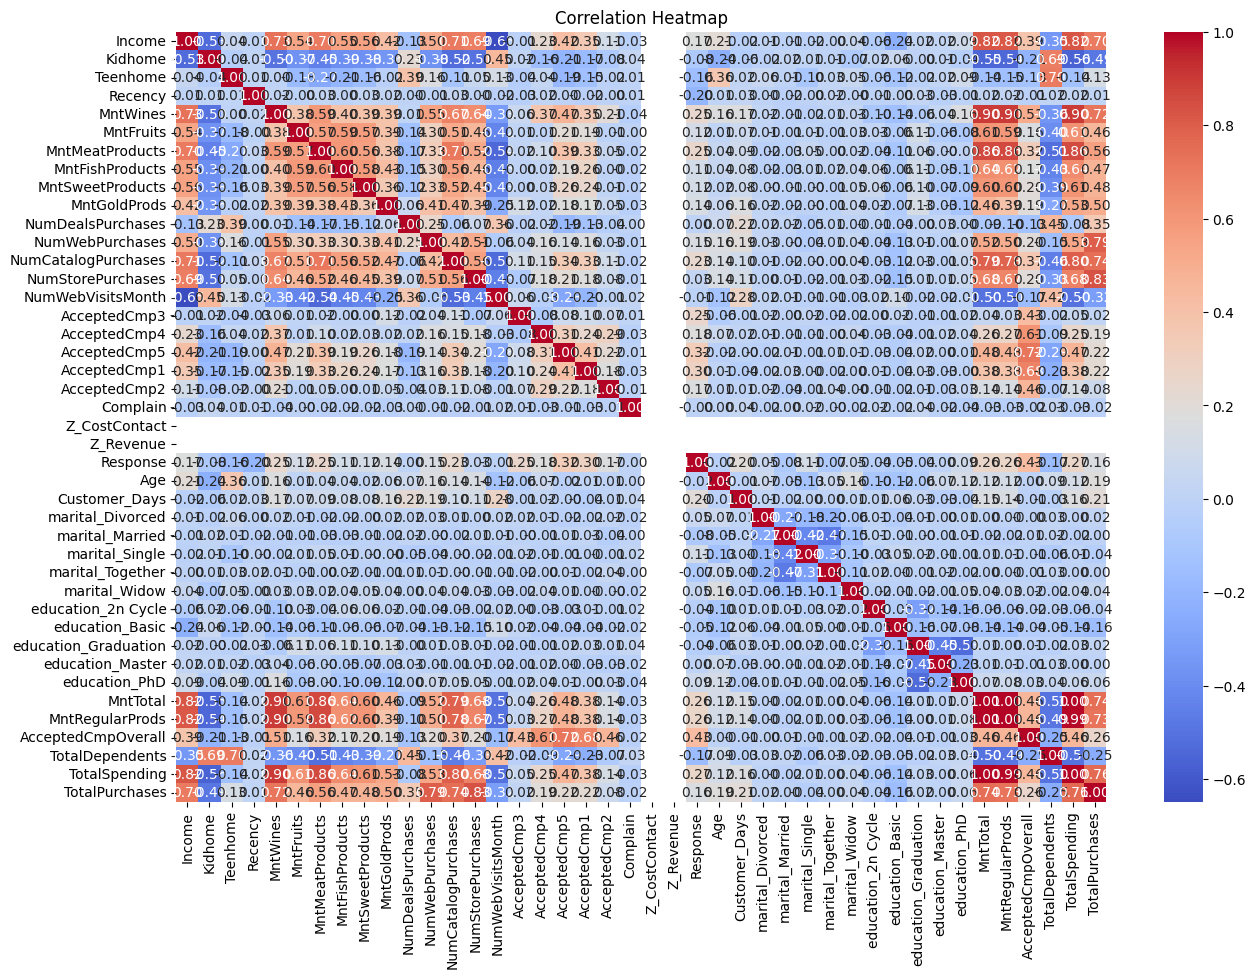

                            OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     777.3
Date:                Sat, 06 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:51:43   Log-Likelihood:                -4925.1
No. Observations:                2205   AIC:                             9858.
Df Residuals:                    2201   BIC:                             9881.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.5675      0.177     

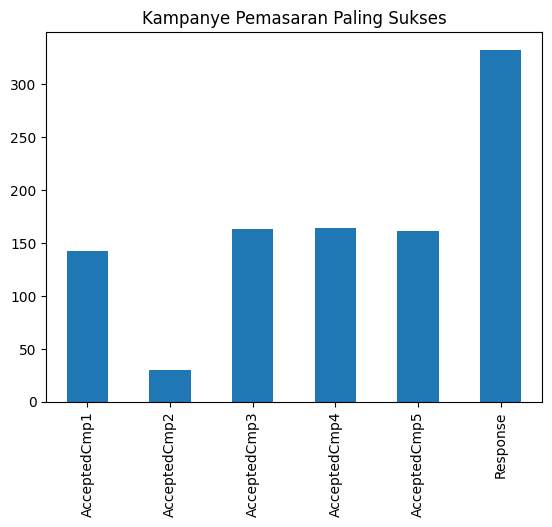

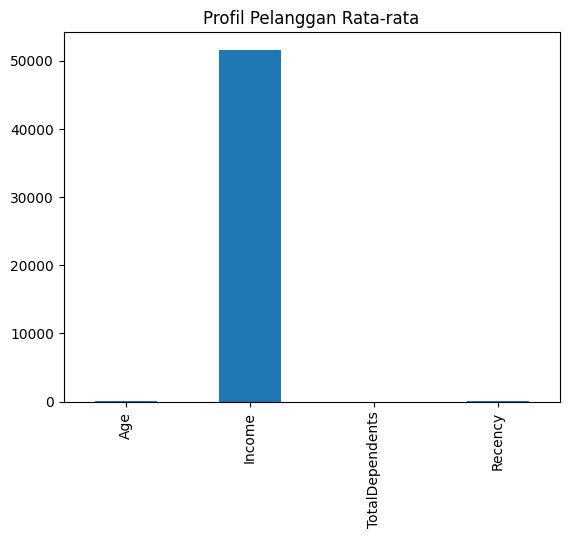

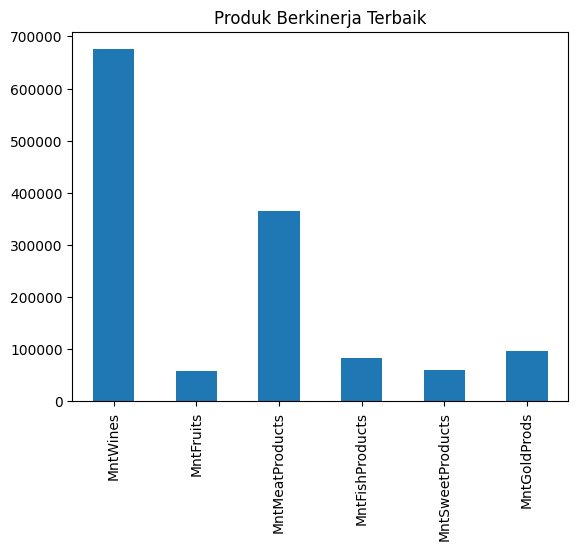

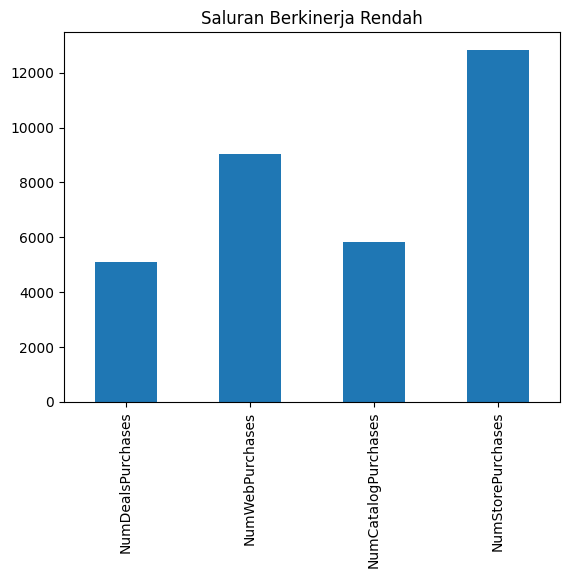

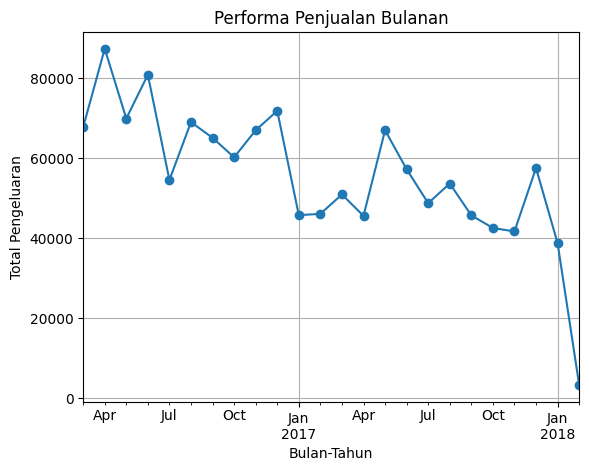

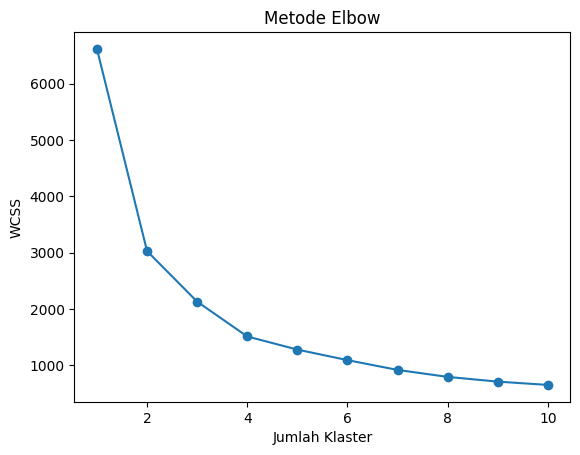

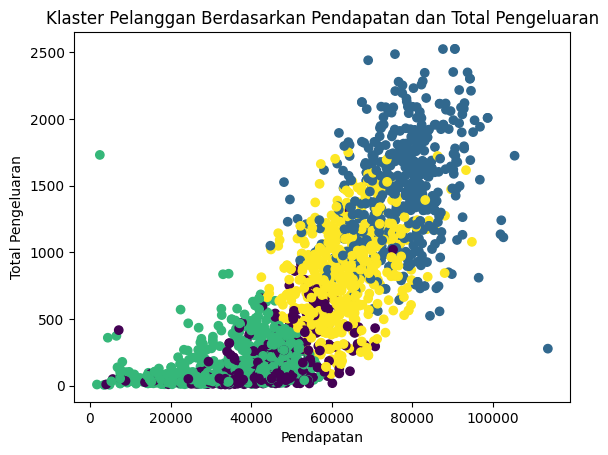

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import kendalltau, ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Load dataset
file_path = 'C:\\Users\\alamp\\OneDrive\\Desktop\\DATASETS\\MARKETINGANALYTICS\\ifood_df.csv'
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    raise

# Display the column names to verify
print("Kolom dalam dataset:", df.columns)

# Handle null values by imputing median for 'Income'
if 'Income' in df.columns:
    df['Income'] = df['Income'].fillna(df['Income'].median())
else:
    print("Column 'Income' not found in the dataset.")
    raise KeyError("Column 'Income' not found.")

# Remove rows where Age > 120 (assuming data entry error)
if 'Age' in df.columns:
    df = df[df['Age'] <= 120]
else:
    print("Column 'Age' not found in the dataset.")
    raise KeyError("Column 'Age' not found.")

# Feature Engineering
df['TotalDependents'] = df['Kidhome'] + df['Teenhome']
df['TotalSpending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['TotalPurchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Linear Regression to identify significant factors for store purchases
X = df[['Income', 'TotalDependents', 'TotalSpending']]
y = df['NumStorePurchases']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Kendall correlation for gold spending and store purchases
kendall_tau, p_value_kendall = kendalltau(df['MntGoldProds'], df['NumStorePurchases'])
print(f"Kendall correlation (tau): {kendall_tau}, p-value: {p_value_kendall}")

# T-test for fish spending and Married PhD candidates
if 'education_PhD' in df.columns and 'marital_Married' in df.columns:
    phd_married = df[(df['education_PhD'] == 1) & (df['marital_Married'] == 1)]['MntFishProducts']
    other_customers = df[~((df['education_PhD'] == 1) & (df['marital_Married'] == 1))]['MntFishProducts']
    t_stat, p_value_ttest = ttest_ind(phd_married, other_customers)
    print(f"t-test p-value: {p_value_ttest}")
else:
    print("Columns 'education_PhD' or 'marital_Married' not found in the dataset.")
    raise KeyError("Columns 'education_PhD' or 'marital_Married' not found.")

# Plot marketing campaign success
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
if all(col in df.columns for col in campaigns):
    campaign_success = df[campaigns].sum()
    campaign_success.plot(kind='bar')
    plt.title('Kampanye Pemasaran Paling Sukses')
    plt.show()
else:
    print("One or more campaign columns not found in the dataset.")
    raise KeyError("One or more campaign columns not found.")

# Plot average customer profile
avg_customer = df.mean()
avg_customer[['Age', 'Income', 'TotalDependents', 'Recency']].plot(kind='bar')
plt.title('Profil Pelanggan Rata-rata')
plt.show()

# Plot best performing products
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
if all(col in df.columns for col in products):
    product_sales = df[products].sum()
    product_sales.plot(kind='bar')
    plt.title('Produk Berkinerja Terbaik')
    plt.show()
else:
    print("One or more product columns not found in the dataset.")
    raise KeyError("One or more product columns not found.")

# Plot underperforming channels
channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
if all(col in df.columns for col in channels):
    channel_sales = df[channels].sum()
    channel_sales.plot(kind='bar')
    plt.title('Saluran Berkinerja Rendah')
    plt.show()
else:
    print("One or more channel columns not found in the dataset.")
    raise KeyError("One or more channel columns not found.")

# Monthly sales performance
if 'Customer_Days' in df.columns:
    df['DtCustomer'] = pd.to_datetime('2024-01-01') - pd.to_timedelta(df['Customer_Days'], unit='D')
    df['MonthYear'] = df['DtCustomer'].dt.to_period('M')

    monthly_sales = df.groupby('MonthYear')['TotalSpending'].sum()
    monthly_sales.plot(kind='line', marker='o')
    plt.title('Performa Penjualan Bulanan')
    plt.xlabel('Bulan-Tahun')
    plt.ylabel('Total Pengeluaran')
    plt.grid(True)
    plt.show()
else:
    print("Column 'Customer_Days' not found in the dataset.")
    raise KeyError("Column 'Customer_Days' not found.")

# Clustering Analysis
# Standardize the data
features = df[['Income', 'TotalDependents', 'TotalSpending']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the optimal number of clusters (e.g., 4 clusters)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.scatter(df['Income'], df['TotalSpending'], c=df['Cluster'], cmap='viridis')
plt.title('Klaster Pelanggan Berdasarkan Pendapatan dan Total Pengeluaran')
plt.xlabel('Pendapatan')
plt.ylabel('Total Pengeluaran')
plt.show()

